# SUPPORT VECTOR MACHINE

## EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset
df = pd.read_csv('mushroom.csv')
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [3]:
# structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [4]:
# duplicates
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

In [5]:
# summary
df.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,976.000000,976.000000,976.000000
mean,633.275615,8.524684,12.598566
std,372.262936,3.703043,6.987077
min,0.000000,2.000000,1.000000
25%,306.750000,5.326820,6.141161
50%,622.500000,8.367245,12.626094
75%,959.250000,11.758624,18.559780
max,1279.000000,15.095066,25.000054


<Axes: xlabel='cap_diameter', ylabel='Count'>

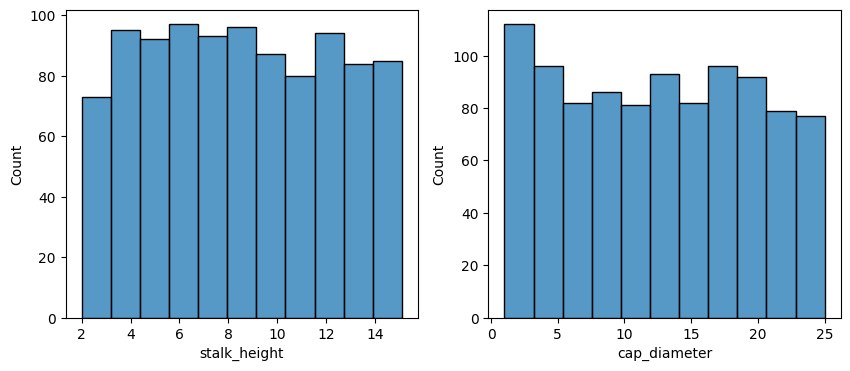

In [6]:
# histograms
fig, ax = plt.subplots(1,2, figsize=(10,4))

sns.histplot(df['stalk_height'], ax=ax[0])
sns.histplot(df['cap_diameter'], ax=ax[1])

## Data Preprocessing

In [7]:
from sklearn.preprocessing import LabelEncoder

for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [8]:
# X,y for Input and Output
X = df.drop(columns=['class', 'Unnamed: 0'], axis=1)
y = df['class']

In [9]:
# split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Data Visualizations

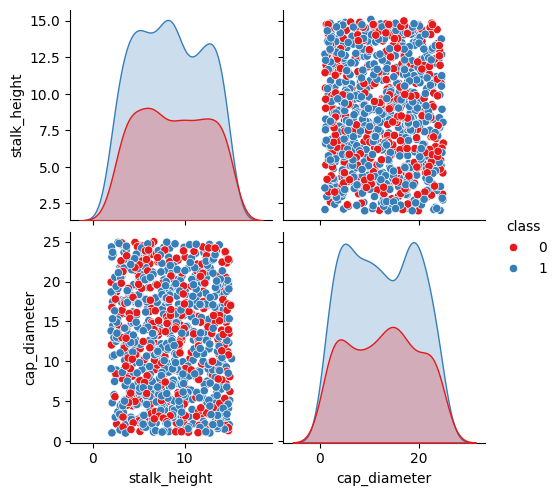

In [10]:
# scatter plot
selected_features = ['stalk_height', 'cap_diameter', 'class']
subset_data = df[selected_features]
sns.pairplot(subset_data, hue='class', palette='Set1', diag_kind='kde', height=2.5)
plt.show()

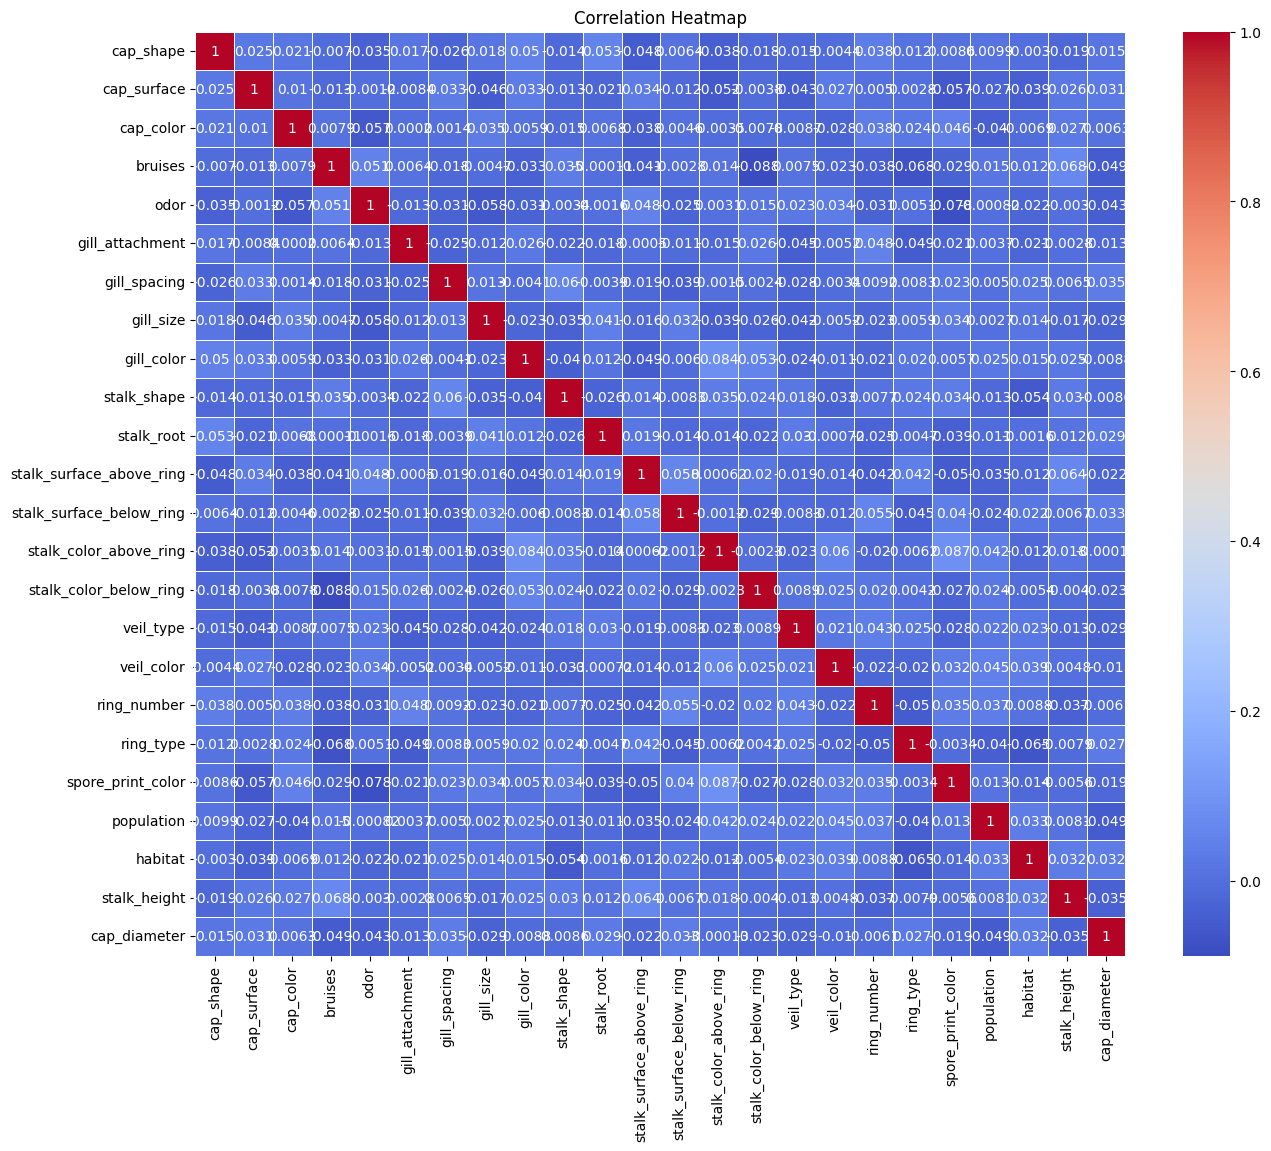

In [11]:
# correlation heatmap
correlation_matrix = X.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-12-0344308c0f9c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, palette='Set2')


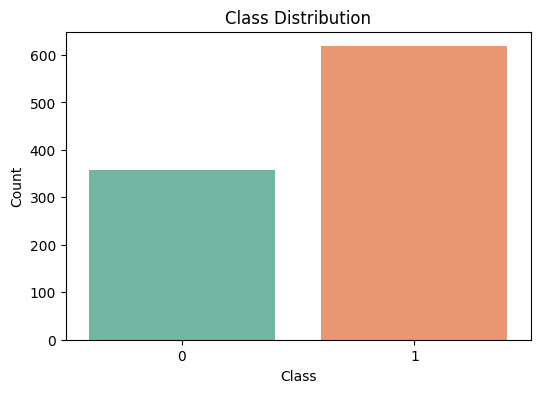

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df, palette='Set2')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

## SVM Implementation

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svc = SVC(kernel='linear', random_state=42)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [14]:
# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[  0  72]
 [  0 124]]


In [15]:
# accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6326530612244898


## Parameter Tuning & Optimization

In [16]:
# find best kernel
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_kernel = grid_search.best_params_['kernel']
print("Best Kernel:", best_kernel)

Best Kernel: linear


In [18]:
# finding best reguralization parameter
param_grid = {'C': [0.1, 1, 10]}
grid_search = GridSearchCV(SVC(kernel=best_kernel), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_C = grid_search.best_params_['C']
print("Best Regularization Parameter (C):", best_C)

Best Regularization Parameter (C): 0.1


In [19]:
# applying best on test
svc = SVC(kernel=best_kernel, C=best_C, random_state=42)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [20]:
# accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6326530612244898




1.   Strengths:


*   Can handle Non linear data.
*   Robust to Outliers.
*   High dimensional data.


2.   Weaknesses:


*   High computational complexity.
*   Bias towards majority class.





Practical implications of SVM in real-world classification tasks could be safety critical applications.

Could have tested the above model with more reguralization parameters, But due to its computational complexities and system malfunctioning while running the cell. I have stopped at accuracy of 63%.